Cloning darknet repo , Darknet is a
Darknet is an open-source neural network framework written in C and CUDA. It is primarily designed for training and deploying deep neural networks for various computer vision tasks, including object detection and recognition.This framework has been trained on COCO dataset.
The COCO (Common Objects in Context) dataset is a widely used benchmark dataset for object detection, segmentation, and captioning. It consists of over 200,000 labeled images covering 80 different object categories.
After cloning this we can see the darknet folder in google collab files.

In [1]:
!git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955
Receiving objects: 100% (5955/5955), 6.37 MiB | 14.76 MiB/s, done.
Resolving deltas: 100% (3932/3932), done.


Going into the darknet folder

In [2]:
cd darknet

/content/darknet


ls command is used to see all the folders inside of it.

In [3]:
ls

cfg/       include/      LICENSE.gen   LICENSE.mit  python/    src/
data/      LICENSE       LICENSE.gpl   LICENSE.v1   README.md
examples/  LICENSE.fuck  LICENSE.meta  Makefile     scripts/


this command executes all the instructions which are there in the Makefile, which contains all the instructions required to setup YOLOv3.

In [4]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
In file included from /usr/include/string.h:495,
                 from ./src/utils.c:3:
In function ‘strncpy’,
    inlined from ‘copy_string’ at ./src/utils.c:426:5:
/usr/include/x86_64-linux-gnu/bits/string_fortified.h:106:10: warning: ‘__builtin_strncpy’ specified bound depends on the length of the source argument [-Wstringop-overflow=]
  106 |   return __builtin___strncpy_chk (__dest, __src, __len, __bos (__dest));
      |          ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
./src/utils.c: In function ‘copy_string’:
./src/utils.c:426:22: note: length computed here
  426 |     strncpy(copy, s, strlen(s)+1);
      |                      ^~~~~~~~~
gcc -Iinclude/ -Isrc/ -Wa

Downloading the weights of YOLOv3 , weights is the all the parameters that the model has learned.

In [5]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-07-03 12:04:56--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  80.9MB/s    in 2.9s    

2023-07-03 12:04:59 (80.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



Displaying the image which i got from unsplash.

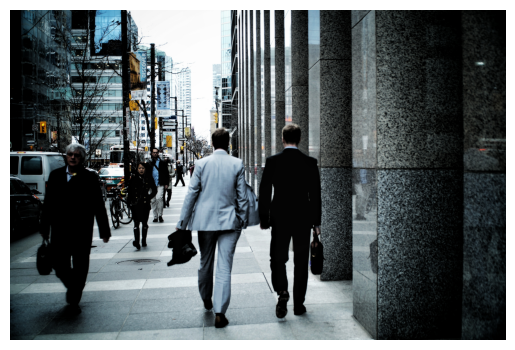

In [7]:
import matplotlib.pyplot as plt
from PIL import Image

filename = "/content/darknet/data/my_image/zsun-fu-TL2e9aPgENs-unsplash.jpg"
image = Image.open(filename)
plt.imshow(image)
plt.axis('off')
plt.show()

executing this entire command to run infrencing on my image.

cfg/yolov3.cfg = YOLO architecture

yolov3.weights = YOLO weights

/content/darknet/data/my_imagezsun-fu-TL2e9aPgENs-unsplash.jpg = my image path

In [8]:
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/darknet/data/my_image/zsun-fu-TL2e9aPgENs-unsplash.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

This shows the ouptut image with bounding boxes around objects with their respective label.

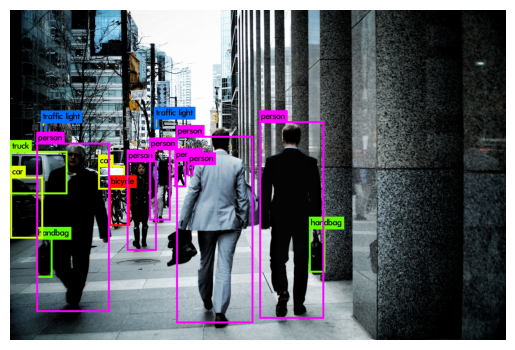

In [9]:

import matplotlib.pyplot as plt
from PIL import Image

filename = "/content/darknet/predictions.jpg"

image = Image.open(filename)
plt.imshow(image)
plt.axis('off')
plt.show()